<a href="https://colab.research.google.com/github/srisri2004/github-pages/blob/main/Copy_of_Language_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# An NLP (Natural Language Processing) model designed to predict the language a given text is written in.
# ***Git-hub respository coming soon***
# Author: Reentika Awasthi



In [ ]:
# import all important libraries
import pandas as pd # helps with data analyisis
import numpy as np  # mathematical functions
import re # characters that form a speech pattern
import seaborn as sns # data visulaization
import matplotlib.pyplot as plt # data visulaization
#import warnings
#warnings.simplefilter("ignore")

In [ ]:
# upload your dataset
from google.colab import files
uploaded = files.upload()


Saving Language Detection 4.13.28 PM.csv to Language Detection 4.13.28 PM (3).csv


In [ ]:
# read/load the dataset
data = pd.read_csv("Language Detection 4.13.28 PM.csv")

FileNotFoundError: ignored

In [ ]:
# counting  values of all languages
value_count = data["Language"].value_counts()

NameError: ignored

In [ ]:
# seperate independent/x + dependent/y variables
independent = data["Text"]
dependent = data["Language"]

In [ ]:

# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dependent = label_encoder.fit_transform(dependent)


In [ ]:
# creating a list for appending the preprocessed text
data_list = []

# go through all text
for text in independent:
    # remove all symbols and numbers (if any)
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # convert all text to lowercase
    text = text.lower()
    # appending to the list created above
    data_list.append(text)

In [ ]:
#  a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
independent = cv.fit_transform(data_list).toarray()
independent.shape

In [ ]:
# split train and testing dataset
from sklearn.model_selection import train_test_split
i_train, i_test,  d_train, d_test = train_test_split(independent, dependent, test_size=0.2)


In [ ]:
# training the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(i_train, d_train)

# predict output of test set
d_pred = model.predict(i_test)



In [ ]:

# evalute the accuracy of our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(d_test, d_pred)
cm = confusion_matrix(d_test, d_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9753384912959381


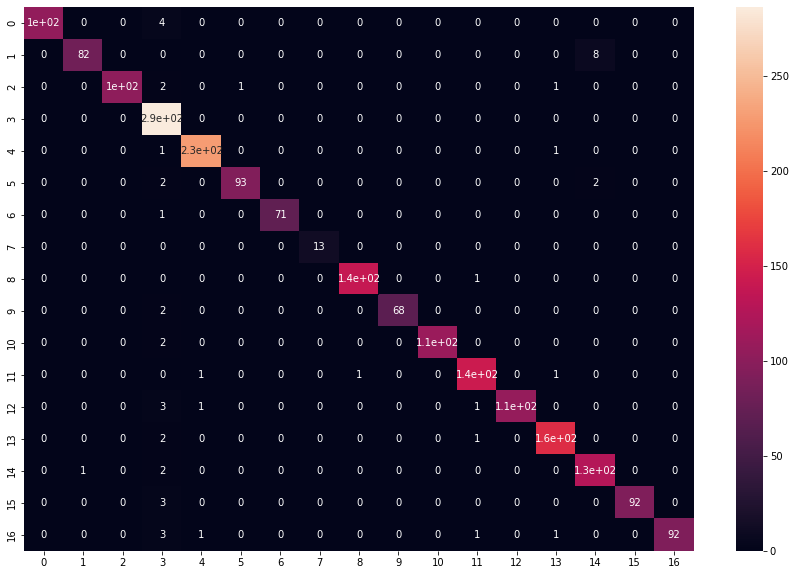

In [ ]:
# plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# predict the data
def predict(text):
     independent = cv.transform([text]).toarray() # convert text to bag of words model
     lang = model.predict(independent) # predict the language
     lang = label_encoder.inverse_transform(lang) # find the language that relates to the predicted value
     print("The langauge is in", lang[0]) # print the language!


PREDICTING LANGUAGES

In [ ]:
predict("arriba") # correct, translate on google to find out what it means :p

The langauge is in Spanish


In [ ]:
predict("dai un'occhiata alla mia pagina Medium!") # correct, translate on google to find out what it means :p

The langauge is in Italian


In [ ]:
predict("నేను నా ప్రతిరూపాన్ని పూర్తి చేసినందుకు చాలా ఆనందంగా ఉంది!") # wrong answer

The langauge is in English


In [ ]:
predict("أنا سعيد لأنني انتهيت من النسخ المتماثل") # correct, translate on google to find out what it means :p

The langauge is in Arabic


In [ ]:
predict("Kuv zoo siab kuv ua tiav kuv Replicate!") # trick question, answer = incorrect :(

The langauge is in French
